# Validate the tide-only 1-layer global MOM6 experiment

### Compare the surface speed simulated by the tide-only 1-layer global MOM6 configuration with that from TPXO data.

Global 1-layer tide-only model output: /scratch/nm03/lxy581/mom6/archive/tides_025/

1st year (M2 only): output000 - output011/ocean_interior.nc

2nd year (M2 + K1): output012 - output023/ocean_interior.nc

TPXO speed: /g/data/nm03/cjs157/v45/tidal_mom/input/m2.nc

TPXO amplitude and phase: /g/data/nm03/TPXO

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import warnings
warnings.filterwarnings('ignore')

### Specify a time

In [2]:
itime = -6

### MOM6: Load the global speed

In [3]:
data = xr.open_dataset('/scratch/nm03/lxy581/mom6/archive/tides_025/output011/ocean_interior.nc')
lon = data.xh
lat = data.yh
spd = data['speed'].isel({'time':itime})

topog = xr.open_dataset('/home/581/lxy581/tidal_param/MOM6-examples/ocean_only/tides_025/INPUT/ocean_topog.nc')
depth = topog.depth

land = xr.where(np.isnan(depth.rename('land')), 1, np.nan)

### MOM6: Plot the ocean depth

In [4]:
# fig = plt.figure(figsize=(10, 8))
# ax = plt.axes(projection=ccrs.Robinson(central_longitude=-100))

# # Add model land mask
# land.plot.contourf(ax=ax, colors='darkgrey', zorder=2, transform=ccrs.PlateCarree(), add_colorbar=False)
# # Add model coastline
# land.fillna(0).plot.contour(ax=ax, colors='k', levels=[0, 1], transform=ccrs.PlateCarree(), add_colorbar=False, linewidths=0.5)

# my_cmap = cm.cm.deep
# #my_cmap.set_bad('gray')

# p1 = ax.pcolormesh(lon, lat, depth, transform=ccrs.PlateCarree(), cmap=my_cmap, vmin=0, vmax=6000)
# plt.title('Ocean Depth')

# ax_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
# cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical', extend='max')
# cb.ax.set_ylabel('Depth (m)');

### MOM6: Plot the speed

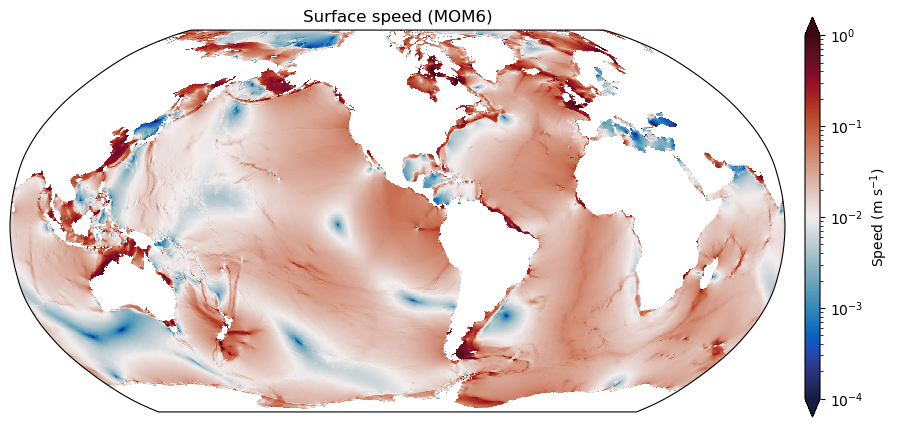

In [5]:
fig = plt.figure(figsize=(10, 8))
ax1 = plt.axes(projection=ccrs.Robinson(central_longitude=-100))

# Add model land mask
land.plot.contourf(ax=ax1, colors='darkgrey', zorder=2, transform=ccrs.PlateCarree(), add_colorbar=False)
# Add model coastline
land.fillna(0).plot.contour(ax=ax1, colors='k', levels=[0, 1], transform=ccrs.PlateCarree(), add_colorbar=False, linewidths=0.5)

my_cmap = cm.cm.balance
#my_cmap.set_bad('gray')

p1 = ax1.pcolormesh(lon, lat, spd, transform=ccrs.PlateCarree(), cmap=my_cmap, norm=LogNorm(vmin=1e-4, vmax=1))
plt.title('Surface speed (MOM6)')

ax1_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb1 = plt.colorbar(p1, cax=ax1_cb, orientation='vertical', extend='both')
cb1.ax.set_ylabel('Speed (m s$^{-1}$)');

### TPXO: Load the global speed

In [6]:
data = xr.open_dataset('/g/data/nm03/cjs157/v45/tidal_mom/input/m2.nc')
lon = data.lon
lat = data.lat
ut  = data.ut
vt  = data.vt
spd = np.sqrt(ut**2+vt**2)

### TPXO: Plot the speed 

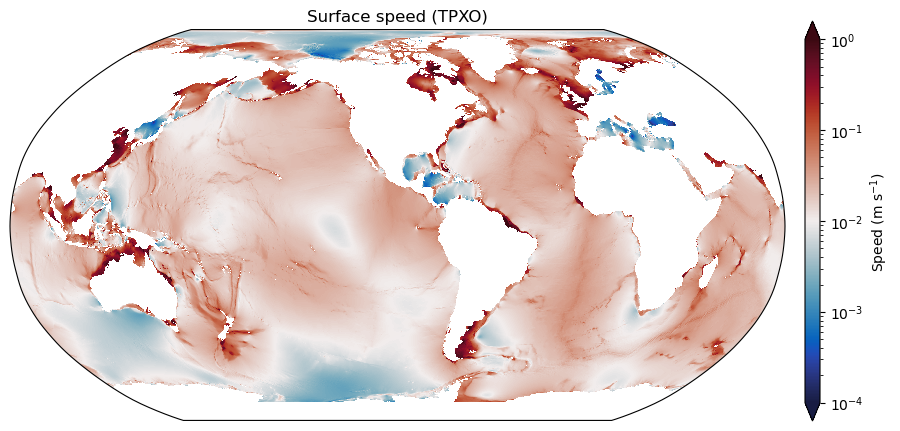

In [7]:
fig = plt.figure(figsize=(10, 8))
ax2 = plt.axes(projection=ccrs.Robinson(central_longitude=-100))

# Add model land mask
land.plot.contourf(ax=ax2, colors='darkgrey', zorder=2, transform=ccrs.PlateCarree(), add_colorbar=False)
# Add model coastline
land.fillna(0).plot.contour(ax=ax2, colors='k', levels=[0, 1], transform=ccrs.PlateCarree(), add_colorbar=False, linewidths=0.5)

my_cmap = cm.cm.balance
#my_cmap.set_bad('gray')

p1 = ax2.pcolormesh(lon, lat, spd, transform=ccrs.PlateCarree(), cmap=my_cmap, norm=LogNorm(vmin=1e-4, vmax=1))
plt.title('Surface speed (TPXO)')

ax2_cb = plt.axes([0.92, 0.25, 0.015, 0.5])
cb1 = plt.colorbar(p1, cax=ax2_cb, orientation='vertical', extend='both')
cb1.ax.set_ylabel('Speed (m s$^{-1}$)');